In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('C:\Users\wkddn\OneDrive\문서\GitHub\Kaggle\kaggle\Pima Indians\diabetes(preprocessing).csv')

In [3]:
df.shape

(768, 16)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Age_low', 'Age_middle', 'Insulin_nan', 'low_glu_insulin']]

X.shape

(768, 12)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
# test_set을 test_size 옵션을 통해 20%로 지정합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
)

In [8]:
X_train.shape, y_train.shape

((614, 12), (614,))

In [9]:
X_test.shape, y_test.shape

((154, 12), (154,))

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [11]:
# model 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [12]:
# 예측을 하고, 결과를 y_predict에 담기
# 0이면 당뇨병이 발병하지않고, 1은 발병
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [13]:
abs(y_predict - y_test).sum()

21

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

86.36363636363636

In [15]:
feature_names = X_train.columns.tolist()

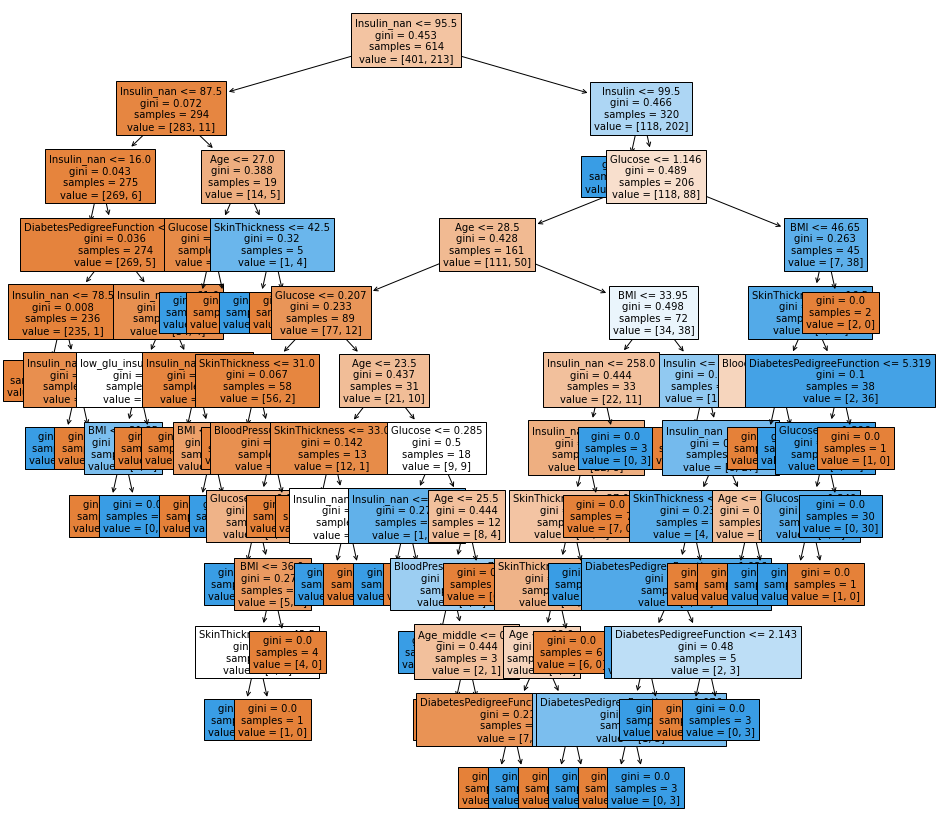

In [16]:
'''
Insulin이 가장 상위 조건으로 나뉘고, gini 계수가 0이면 tree 그리기를 멈춥니다.
샘플의 개수가 밑으로 갈수록 줄어듭니다.
'''
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

## 최적의 max_depth 값 찾기

In [17]:
# for문 안에 모델을 넣으면 max_depth 파라미터를 바꿔가면서 모델을 학습
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 86.36363636363636
4 87.66233766233766
5 85.71428571428571
6 85.71428571428571
7 85.06493506493507
8 84.4155844155844
9 83.76623376623377
10 85.71428571428571
11 86.36363636363636


## Grid Search

In [18]:
'''
param_grid - 튜닝하고 싶은 파라미터 정보 
max_features - 일부 feature만 사용, 1은 전체
n_jobs - -1로 설정하여 사용 가능한 모든 장비를 학습에 이용
cv - cross validation을 5개로 나눔
verbose - 1로 하여 로그를 찍으면서 학습, 0이면 로그 출력 x
'''

from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth':range(3, 12),
"max_features":[0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [19]:
clf.best_params_ # 가장 성능이 좋은 파라미터

{'max_depth': 5, 'max_features': 0.9}

In [20]:
clf.best_estimator_ # 가장 좋은 성능을 내는 파라미터 조합 전체

DecisionTreeClassifier(max_depth=5, max_features=0.9, random_state=42)

In [21]:
clf.best_score_ # 가장 좋은 점수

0.889257630281221

In [22]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.006401,0.003200,0.0048,0.003919,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.869919,0.926829,0.869919,0.886179,0.893443,0.889258,0.020912,1
8,0.006400,0.003200,0.0016,0.003200,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.861789,0.943089,0.861789,0.869919,0.877049,0.882727,0.030714,2
17,0.004800,0.003919,0.0048,0.003919,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.853659,0.918699,0.845528,0.878049,0.885246,0.876236,0.025847,3
3,0.006400,0.003200,0.0032,0.003919,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.853659,0.902439,0.861789,0.878049,0.885246,0.876236,0.017260,3
23,0.006400,0.003200,0.0016,0.003200,7,0.9,"{'max_depth': 7, 'max_features': 0.9}",0.861789,0.918699,0.861789,0.861789,0.877049,0.876223,0.022045,5


In [23]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [24]:
clf.score(X_test, y_test)

0.8701298701298701

## Grid Search - 우리가 설정한 범위 안에섬나 parameter을 탐색
## Random Search는 좋은 성능을 낼 수 있는 랜덤 값을 탐색

In [25]:
max_depth = np.random.randint(3, 20, 10)
max_depth
 
max_features = np.random.uniform(0.7, 1.0, 100)
 
param_distributions = {"max_depth" :max_depth,
           "max_features": max_features,
           "min_samples_split" : list(range(2, 7))
           }


In [26]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
    param_distributions,
    n_iter=1000,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
    )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 8, 18, 17, 10,  7, 19, 18, 15, 11, 10]),
                                        'max_features': array([0.9452264 , 0.85242337, 0.91222139, 0.89088946, 0.86439672,
       0.89903002, 0.82701705, 0.70252685, 0.78093181, 0.80817531,
       0.76479516, 0.8190964 , 0.89667215, 0.73730873, 0.80693595...
       0.83967108, 0.92469188, 0.73691879, 0.79858275, 0.88844703,
       0.91929883, 0.72541299, 0.75967416, 0.81815797, 0.7575103 ,
       0.99705433, 0.76764331, 0.77349905, 0.7545435 , 0.72492987,
       0.98932634, 0.8444388 , 0.96706962, 0.87345199, 0.80311253,
       0.72386782, 0.70674719, 0.94404922, 0.98717528, 0.70202202,
       0.70212696, 0.73998376, 0.94751177, 0.9768296 , 0.84323744]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, s

In [27]:
clf.best_params_

{'min_samples_split': 6, 'max_features': 0.9840872498798896, 'max_depth': 8}

In [28]:
clf.best_score_

0.8843395974943355

In [29]:
clf.score(X_test, y_test)

0.8506493506493507

In [30]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
159,0.008000,5.687370e-06,0.001600,0.003200,6,0.949202,8,"{'min_samples_split': 6, 'max_features': 0.949...",0.861789,0.926829,0.861789,0.902439,0.868852,0.88434,0.026038,1
139,0.006400,3.199887e-03,0.001598,0.003197,6,0.931389,8,"{'min_samples_split': 6, 'max_features': 0.931...",0.861789,0.926829,0.861789,0.902439,0.868852,0.88434,0.026038,1
981,0.008001,5.722046e-07,0.003200,0.003919,6,0.95805,8,"{'min_samples_split': 6, 'max_features': 0.958...",0.861789,0.926829,0.861789,0.902439,0.868852,0.88434,0.026038,1
479,0.003200,3.919192e-03,0.004800,0.003919,6,0.997236,8,"{'min_samples_split': 6, 'max_features': 0.997...",0.861789,0.926829,0.861789,0.902439,0.868852,0.88434,0.026038,1
367,0.001600,3.199673e-03,0.008000,0.005059,6,0.989326,8,"{'min_samples_split': 6, 'max_features': 0.989...",0.861789,0.926829,0.861789,0.902439,0.868852,0.88434,0.026038,1


## Random Forest - 샘플링하여 여러 데이터를 만들며, 이 샘플은 부트스트랩이라고 함
## 이를 통해 오버피팅을 방지할 수 있음

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [34]:
# 다르게 예측한 데이터들을 카운트하여 갯수를 세줌
(y_predict != y_test).sum()


21

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8636363636363636

In [36]:
# 랜덤포레스트
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [37]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [38]:
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
# DecisionTree에서 21개였는데 17개로 줄음
(y_predict != y_test).sum()

17

In [40]:
# 점수 상승
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8896103896103896

In [41]:
model.feature_importances_

array([0.1286992 , 0.00616818, 0.01537256, 0.20329252, 0.02818364,
       0.02233634, 0.07542635, 0.00158216, 0.00611567, 0.00228346,
       0.51053992, 0.        ])

<AxesSubplot:>

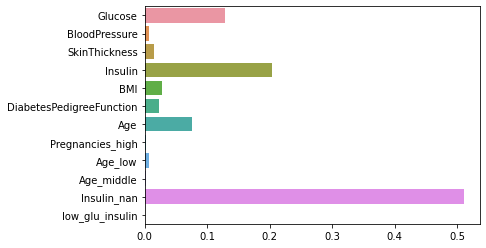

In [42]:
feature_names = X_train.columns.tolist()
 
sns.barplot(x=model.feature_importances_, y=feature_names)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [44]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [45]:
model.feature_importances_

array([0.1286992 , 0.00616818, 0.01537256, 0.20329252, 0.02818364,
       0.02233634, 0.07542635, 0.00158216, 0.00611567, 0.00228346,
       0.51053992, 0.        ])

<AxesSubplot:>

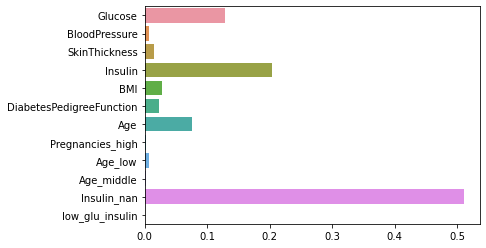

In [46]:
feature_names = X_train.columns.tolist()
 
sns.barplot(x=model.feature_importances_, y=feature_names)

In [47]:
y_predict = model.predict(X_test)
y_predict[:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
(y_predict != y_test).sum()

17

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8896103896103896

## 여러 개의 알고리즘을 사용해서 비교하기

In [50]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=42)
estimator

DecisionTreeClassifier(random_state=42)

In [51]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth,
"max_features": max_features}
 
clf = RandomizedSearchCV(estimator,
param_distributions,
n_iter=100,
scoring="accuracy",
n_jobs=-1,
cv=5,
verbose=2
)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 15, 12, 14,  7,  7,  4, 13,  9, 12]),
                                        'max_features': array([0.91213127, 0.42406796, 0.63593953, 0.99953858, 0.81905099,
       0.91839553, 0.87836785, 0.46532788, 0.95401738, 0.62603307])},
                   scoring='accuracy', verbose=2)

In [52]:
clf.best_params_

{'max_features': 0.6359395262321976, 'max_depth': 4}

In [53]:
clf.best_score_

0.8924963347994135

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
RandomForestClassifier(random_state=42),
GradientBoostingClassifier(random_state=42)
]
estimators


[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [55]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [56]:
'''
clf를 estimator가 있는 for문 안으로 넣어서 3개의 모델을 모두 번갈아 학습시킬 수 있도록 한다.
Decision Tree는 n_estimators라는 트리의 개수를 뜻하는 파라미터를 사용할 수 있음
n_estimator의 크기가 클수록 모델을 학습하는 데에 시간이 오래 걸림
각 모델 중 가장 좋은 스코어를 result에 기록
'''
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [57]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.46566474117970835, 'max_dep...",0.890897,0.902597,"{'mean_fit_time': [0.008005380630493164, 0.006..."
1,RandomForestClassifier,"{'n_estimators': 143, 'max_features': 0.629941...",0.905544,0.876623,"{'mean_fit_time': [0.3587786674499512, 0.44591..."
2,GradientBoostingClassifier,"{'n_estimators': 198, 'max_features': 0.381748...",0.900666,0.883117,"{'mean_fit_time': [0.9500644207000732, 1.30691..."


In [58]:
# 모델에 각각 접근하여 상위에 있는 모델 순서대로 보거나 정확한 parameter 설정 수치를 볼 수 있음
# 좋은 성능이 나오는 구간으로 계속 iteration을 돌릴 필요가 있음
# 하이퍼 파라미터 튜닝을 여러 번 할수록 좋은 성능을 얻을 수 있음
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
61,0.461010,0.046465,0.024241,0.000481,143,0.629942,18,"{'n_estimators': 143, 'max_features': 0.629941...",0.869919,0.951220,0.894309,0.902439,0.909836,0.905544,0.026494,1
93,0.490385,0.052001,0.031482,0.009000,155,0.629942,15,"{'n_estimators': 155, 'max_features': 0.629941...",0.869919,0.951220,0.878049,0.902439,0.918033,0.903932,0.029203,2
72,0.461084,0.042364,0.027484,0.003724,143,0.629942,8,"{'n_estimators': 143, 'max_features': 0.629941...",0.878049,0.951220,0.878049,0.902439,0.909836,0.903918,0.026882,3
67,0.379199,0.037728,0.019200,0.003919,107,0.902106,8,"{'n_estimators': 107, 'max_features': 0.902105...",0.869919,0.959350,0.869919,0.894309,0.909836,0.900666,0.033043,4
92,0.345029,0.018090,0.021429,0.004573,110,0.629942,18,"{'n_estimators': 110, 'max_features': 0.629941...",0.861789,0.934959,0.894309,0.902439,0.909836,0.900666,0.023728,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.486400,0.049934,0.027200,0.003919,155,0.889162,2,"{'n_estimators': 155, 'max_features': 0.889162...",0.837398,0.853659,0.845528,0.886179,0.819672,0.848487,0.021952,96
63,0.350400,0.030942,0.025599,0.003199,125,0.889162,2,"{'n_estimators': 125, 'max_features': 0.889162...",0.837398,0.853659,0.813008,0.878049,0.836066,0.843636,0.021536,97
89,0.359999,0.024787,0.019200,0.003920,127,0.891676,2,"{'n_estimators': 127, 'max_features': 0.891675...",0.837398,0.853659,0.813008,0.829268,0.819672,0.830601,0.014203,98
53,0.348662,0.012966,0.020872,0.006437,127,0.91486,2,"{'n_estimators': 127, 'max_features': 0.914860...",0.837398,0.853659,0.813008,0.829268,0.819672,0.830601,0.014203,98
